# K-Nearest Neighbors Classification on Car Evaluation dataset to determine the safety level of a car

Dataset source: Bohanec,Marko. (1997). Car Evaluation. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.

## Load dataset from CSV to DataFrame

In [21]:
import pandas as pd

# make own headers because the CSV has none
col_names = ["buying","maintenance","doors","persons","trunk","safety","class"]

csv_path = "./Data/car.data"
df = pd.read_csv(csv_path, header=None, names=col_names)

df

,buying,maintenance,doors,persons,trunk,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Pre-processing: Convert categorical data into numerical data
Categorical data  must be converted into numerical data  before performing any other data manipulation. 

['low', 'med', 'high', 'vhigh'] -> [0, 1, 2, 3]

Because the categories in this dataset has a natural order to it, OridnalEncoder is the most appropriate encoder.

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# define the order of categorical data in ascending order
categorical_orders = {
    'buying':['low', 'med', 'high', 'vhigh'],
    'maintenance':['low', 'med', 'high', 'vhigh'],
    'doors':['2', '3', '4', '5more'],
    'persons':['2', '4', 'more'],
    'trunk':['small', 'med', 'big'],
    'safety':['low', 'med', 'high'],
    'class':['unacc', 'acc', 'good', 'vgood']
}

# datatype assertion
for column in categorical_orders.keys():
    df[column] = df[column].astype(str)

#
for column, order in categorical_orders.items():
    # reshape to 2D array bc OrdinalEncoder expects such
    column_data = df[column].values.reshape(-1, 1)

    # encoder instance using category order
    encoder = OrdinalEncoder(categories=[order])

    # fit the data
    encoded_data = encoder.fit_transform(column_data)

    # replace original column with encoded one
    df[column] = encoded_data.ravel()

df

,buying,maintenance,doors,persons,trunk,safety,class
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1724,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1725,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1726,0.0,0.0,3.0,2.0,2.0,1.0,2.0


## Define features and target
It may be thought as:  
Features -> independent variable  
Target -> dependent variable

In [28]:
# define features (independent variable)
X = df.drop('class', axis=1)

# define targets (dependent variable)
y = df['class']

print(f"Features:\n{X}\n")
print(f"Target:\n{y}")

Features:
      buying  maintenance  doors  persons  trunk  safety
0        3.0          3.0    0.0      0.0    0.0     0.0
1        3.0          3.0    0.0      0.0    0.0     1.0
2        3.0          3.0    0.0      0.0    0.0     2.0
3        3.0          3.0    0.0      0.0    1.0     0.0
4        3.0          3.0    0.0      0.0    1.0     1.0
...      ...          ...    ...      ...    ...     ...
1723     0.0          0.0    3.0      2.0    1.0     1.0
1724     0.0          0.0    3.0      2.0    1.0     2.0
1725     0.0          0.0    3.0      2.0    2.0     0.0
1726     0.0          0.0    3.0      2.0    2.0     1.0
1727     0.0          0.0    3.0      2.0    2.0     2.0

[1728 rows x 6 columns]

Target:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1723    2.0
1724    3.0
1725    0.0
1726    2.0
1727    3.0
Name: class, Length: 1728, dtype: float64


# Split data into train-test split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

## Define and train model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# define model
knn_model = KNeighborsClassifier(n_neighbors=3)

# train model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Test model

In [61]:
# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

## Evaluate model

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# compute scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1-score:{f1}")

print(f"\nReport:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9143518518518519
Precision:0.9121212180489882
Recall:0.9143518518518519
F1-score:0.9117660176928583

Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       611
         1.0       0.87      0.79      0.83       185
         2.0       0.77      0.67      0.71        30
         3.0       0.90      0.71      0.79        38

    accuracy                           0.91       864
   macro avg       0.87      0.79      0.82       864
weighted avg       0.91      0.91      0.91       864



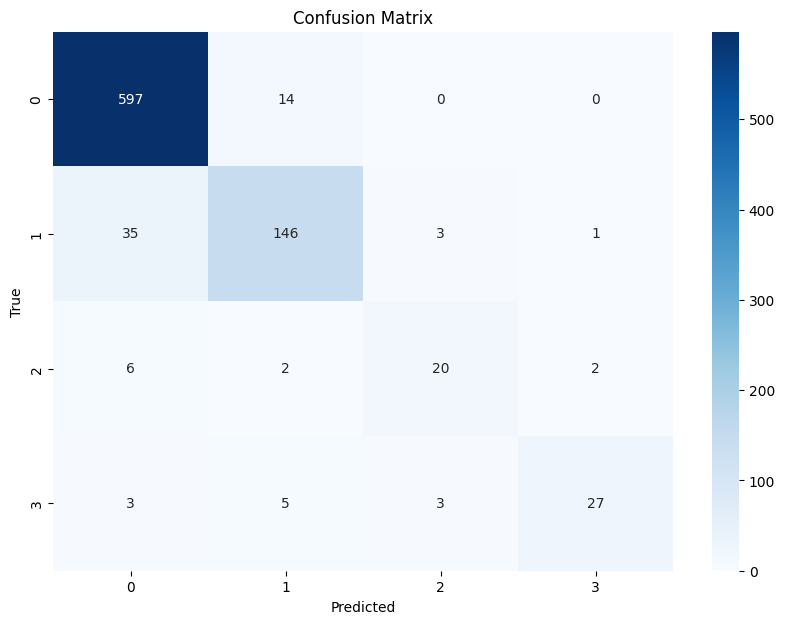

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Export model
Using joblb.dump, export the model in to a .joblib file 'knn_car_eval.joblib' to be loaded and queried later on.

In [64]:
from joblib import dump

dump(knn_model, './Models/knn_car_eval.joblib')

['knn_car_eval.joblib']